In [1]:
import re
import nltk
import spacy
import pandas as pd
import seaborn as sb
# hi

In [ ]:
!python -m spacy download el_core_news_md
nltk.download('stopwords')

In [2]:
nlp = spacy.load('el_core_news_md')

In [3]:
train_df = pd.read_csv('translated_with_api/translated_train_clean.csv')
train_df.head(10)

,Statement,Label
0,"""Λέει ότι η πολιτική ομάδα Annies List υποστηρ...",False
1,"""Πότε άρχισε η παρακμή του άνθρακα; Ξεκίνησε ό...",True
2,"""Η Χίλαρι Κλίντον συμφωνεί με τον Τζον Μακέιν ...",True
3,"""Η νομοθεσία για τη μεταρρύθμιση της υγειονομι...",False
4,"""Η οικονομική ανάκαμψη ξεκίνησε στο τέλος της ...",True
5,"""Οι Chicago Bears είχαν περισσότερους αρχηγούς...",True
6,"""Ο Jim Dunnam δεν έχει ζήσει στην περιοχή που ...",False
7,"""Είμαι ο μόνος άνθρωπος σε αυτή τη σκηνή που ε...",True
8,"""Ωστόσο, χρειάστηκαν 19,5 εκατομμύρια δολάρια ...",True
9,"""Λέει ότι οι πρωτοβάθμιοι αντίπαλοι του GOP Gl...",True


<AxesSubplot:xlabel='Label', ylabel='count'>

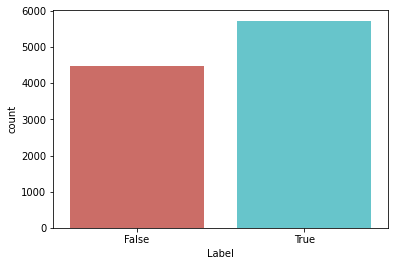

In [4]:
def create_distribution(dataFile):
    return sb.countplot(x='Label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_df)

In [5]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10198 entries, 0 to 10197
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10198 non-null  object
 1   Label      10198 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 89.8+ KB
check finished.


In [6]:
label_train = train_df.Label

In [ ]:
train_df = train_df.drop('Label', axis=1)

In [9]:
train_df.head(10)

,Statement
0,"""Λέει ότι η πολιτική ομάδα Annies List υποστηρ..."
1,"""Πότε άρχισε η παρακμή του άνθρακα; Ξεκίνησε ό..."
2,"""Η Χίλαρι Κλίντον συμφωνεί με τον Τζον Μακέιν ..."
3,"""Η νομοθεσία για τη μεταρρύθμιση της υγειονομι..."
4,"""Η οικονομική ανάκαμψη ξεκίνησε στο τέλος της ..."
5,"""Οι Chicago Bears είχαν περισσότερους αρχηγούς..."
6,"""Ο Jim Dunnam δεν έχει ζήσει στην περιοχή που ..."
7,"""Είμαι ο μόνος άνθρωπος σε αυτή τη σκηνή που ε..."
8,"""Ωστόσο, χρειάστηκαν 19,5 εκατομμύρια δολάρια ..."
9,"""Λέει ότι οι πρωτοβάθμιοι αντίπαλοι του GOP Gl..."


In [10]:
train_df.shape

(10198, 1)

In [12]:
random = train_df['Statement'][288]

In [ ]:
doc = nlp(random)

for word in doc:
    print(word.text, word.pos_, word.dep_)


In [16]:
tokenizer = nlp.tokenizer

In [17]:
tokenizer(random)

"Ενώ αγωνιζόταν για την αυστηροποίηση των ποινών για διακρίσεις λόγω φύλου στον χώρο εργασίας, ο γερουσιαστής Glenn Grothman δήλωσε ότι δεν πιστεύει ότι οι γυναίκες ανήκουν στον χώρο εργασίας, αλλά ότι ανήκουν στο σπίτι, στο μαγείρεμα, στην καθαριότητα και στη γέννα."

In [21]:
tokenizer('Ο ΨΑΡΑΣ ΠΗΓΕ ΓΙΑ ΨΑΡΕΜΑ ΣΤΗΝ ΘΑΛΑΣΣΑ')

Ο ΨΑΡΑΣ ΠΗΓΕ ΓΙΑ ΨΑΡΕΜΑ ΣΤΗΝ ΘΑΛΑΣΣΑ